Saving audi_dataset(4).xlsx to audi_dataset(4) (4).xlsx
From dealership? (1 = yes, 0 = no): 0
Vehicle age (in years): 9
Model (e.g., A3, A4): A3
Trim (e.g., premium, premium +, manual): premium
All-wheel drive? (1 = yes, 0 = no): 1
Engine capacity (e.g., 2.0): 2.0
Powertrain configuration (e.g., tfsi, fsi): tfsi
Transmission (e.g., 8sp, autosp, auto, 0d tiptronic): 6sp, auto, s tiptronic
S line? (1 = yes, 0 = no): 0
Is it a coupe? (1 = yes, 0 = no): 0
Etron? (1 = yes, 0 = no): 0
Color (e.g., black, white): white
Tinted windows? (1 = yes, 0 = no): 0
Aftermarket rims? (1 = yes, 0 = no): 0
Milage (total miles): 85000
KBB high price estimate: 10115
Is the title salvage? (1 = yes, 0 = no): 1

Estimated price for your vehicle: $10,233.47


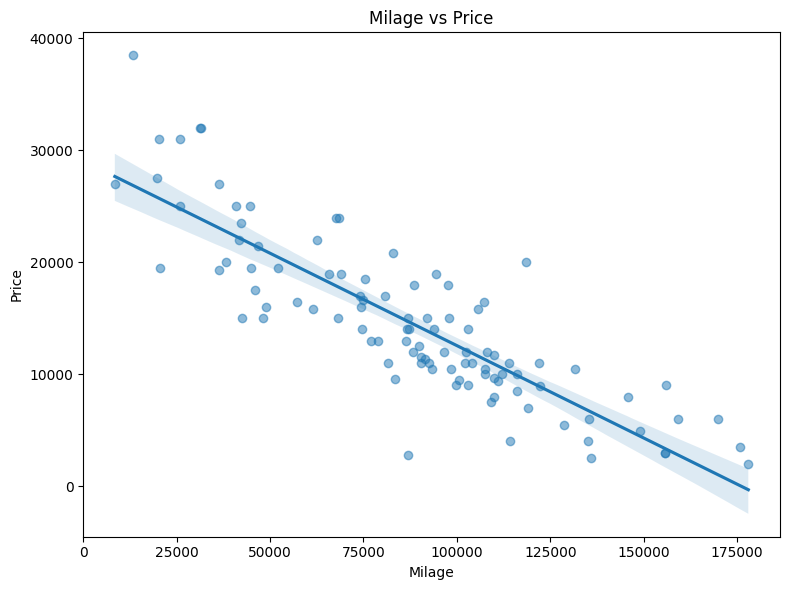

In [5]:
# Imports/Uploads
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from google.colab import files
uploaded = files.upload()

# Load data and define feature types
df = pd.read_excel("audi_dataset(4).xlsx")
boolean_features = ['dealership','awd','s_line','coupe','etron','tint','rims','salvage']
df[boolean_features] = df[boolean_features].fillna(0)
numerical_features = ['age', 'milage', 'kbb_high']
categorical_features = ['model','trim','engine_capacity','powertrain_configuration','transmission','color']
target = 'price'

# Impute missing datapoints
for col in numerical_features:
    df[col] = df[col].fillna(df[col].median())
categorical_features = ['model','trim','powertrain_configuration','transmission','color']
for col in boolean_features:
    df[col] = df[col].fillna(df[col].mode()[0])
for col in categorical_features:
    df[col] = df[col].fillna(df[col].mode()[0])

# Convert boolean features to integers
for col in boolean_features:
    df[col] = df[col].astype(int)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df[boolean_features + numerical_features + categorical_features], drop_first=True)

# Define features (X) and target (y)
X = df_encoded
y = df['price']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)


# Vehicle prediction example
# define the raw input for vehicle
my_car_raw = {
    'dealership': int(input("From dealership? (1 = yes, 0 = no): ")),
    'age': int(input("Vehicle age (in years): ")),
    'model': input("Model (e.g., A3, A4): "),
    'trim': input("Trim (e.g., premium, premium +, manual): "),
    'awd': int(input("All-wheel drive? (1 = yes, 0 = no): ")),
    'engine_capacity': input("Engine capacity (e.g., 2.0): "),
    'powertrain_configuration': input("Powertrain configuration (e.g., tfsi, fsi): "),
    'transmission': input("Transmission (e.g., 8sp, autosp, auto, 0d tiptronic): "),
    's_line': int(input("S line? (1 = yes, 0 = no): ")),
    'coupe': int(input("Is it a coupe? (1 = yes, 0 = no): ")),
    'etron': int(input("Etron? (1 = yes, 0 = no): ")),
    'color': input("Color (e.g., black, white): "),
    'tint': int(input("Tinted windows? (1 = yes, 0 = no): ")),
    'rims': int(input("Aftermarket rims? (1 = yes, 0 = no): ")),
    'milage': int(input("Milage (total miles): ")),
    'kbb_high': int(input("KBB high price estimate: ")),
    'salvage': int(input("Is the title salvage? (1 = yes, 0 = no): ")),
    'price': 0
}

my_car_df_raw = pd.DataFrame([my_car_raw])
# impute and convert to match training structure
# impute booleans
my_car_df_raw[boolean_features] = my_car_df_raw[boolean_features].fillna(0).astype(int)
# impute numerics
for col in numerical_features:
    if col != 'price':
        if my_car_df_raw[col].isnull().any():
            my_car_df_raw[col] = my_car_df_raw[col].fillna(df[col].median())
# impute categoricals
for col in categorical_features:
    if my_car_df_raw[col].isnull().any():
        my_car_df_raw[col] = my_car_df_raw[col].fillna(df[col].mode()[0])

# one-hot encode to match training data
my_car_encoded = pd.get_dummies(my_car_df_raw[boolean_features + numerical_features + categorical_features], drop_first=True)
# align columns with training features
my_car_encoded = my_car_encoded.reindex(columns=X.columns, fill_value=0)

# predict price
predicted_price = model.predict(my_car_encoded)[0]
print(f"\nEstimated price for your vehicle: ${predicted_price:,.2f}")

# Visualizing
import seaborn as sns
import matplotlib.pyplot as plt
# relationship between single variable and price
plt.figure(figsize=(8, 6))
sns.regplot(x='milage', y='price', data=df, scatter_kws={'alpha':0.5})
plt.title('Milage vs Price')
plt.xlabel('Milage')
plt.ylabel('Price')
plt.tight_layout()
plt.show()